## 📌О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками **Pandas и NumPy**.

- Библиотека Pandas удобная для работы с табличными данными в Python. Наличие готовых методов позволяет не реализовывать самостоятельно поэлементную обработку данных и оперировать сразу целыми таблицами данных. Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом. DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов. Подробнее с основными возможностями библиотеки можно ознакомиться здесь: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html


- Библиотека NumPy позволяет сравнительно легко и удобно выполнять разнообразные вычисления, избегая самостоятельной реализации поэлементной обработки. При выполнении заданий из данной части необходимо написать код решения внутри функции и убедиться, что она работает, с помощью assert на выражение с использованием этой функции для данных из условия. Также постарайтесь (настоятельно рекомендуется!) не использовать циклы и условный оператор. Подробнее с основными возможностями библиотеки можно ознакомиться здесь: https://numpy.org/doc/stable/reference/index.html

### 😘 Напутствие:
- Помните, что data scientist профессия креативная, поэтому не существуют единственно верного ответа, на прдложенные ниже задачи.
- Старайтесь максимально задействовать арсенал библиотек.
- Пишите читаемый понятный код.
- Если задача не получается - не сдавайтесь. Гугл и stackoverflow вам в помощь!

### 🐼Pandas

Начнем погружение в data science с классики. В данной части домашней работы вы будете исследовать данные о пассажирах Титаника.

https://www.kaggle.com/c/titanic/data

Вам требуется скачать данные и выполнить задания.

In [138]:
import pandas as pd
from matplotlib import pyplot as plt

✅ 1. Откройте в ноутбуке файл с данными ("train.csv") и выведите первые и последние 5 строк датафрейма

In [139]:
df = pd.read_csv('data/train.csv')

In [140]:
pd.concat([df.head(5), df.tail(5)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


✅ 2. Какой размер имеет датафрейм?

In [141]:
df.shape

(891, 12)

✅ 3. Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

1) Регрессия - предсказать стоимость билета
2) Классификация - выжил или погиб
3) Найти группы возрастов людей, которые выжили в большинстве

In [142]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

✅ 4. Какова доля выживших после крушения:
    - всех пассажиров
    - мужчин
    - женщин?

In [143]:
survived = df[df['Survived'] == 1]
survived_female = survived[survived['Sex'] == 'female'].shape[0]
survived_male = survived[survived['Sex'] == 'male'].shape[0]

print(f'Доля выживших среди всех пассажиров: {df['Survived'].mean()}')
print(f'Доля выживших женщин среди пассажиров: {survived_female / df.shape[0]}')
print(f'Доля выживших мужчин среди пассажиров: {survived_male / df.shape[0]}')

Доля выживших среди всех пассажиров: 0.3838383838383838
Доля выживших женщин среди пассажиров: 0.2615039281705948
Доля выживших мужчин среди пассажиров: 0.122334455667789


✅ 5. Сколько пассажиров ехало в каждом классе?

In [144]:
df.groupby('Pclass')['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

✅ 6. Сколько в среднем пассажиры заплатили за проезд?

In [145]:
df['Fare'].mean()

np.float64(32.204207968574636)

✅ 7. Все ли признаки несут в себе полезную информацию?
    - Избавьтесь от ненужных столбцов, опишите почему вы решили от них избавиться

In [146]:
# PassengerId, Name, Ticket, Embarked
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


✅ 8. Есть ли в данных пропуски? В каких столбцах: сколько пропусков в каждом из них?

In [147]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
dtype: int64

✅ 9. Предположите каким значением стоит заполнить пропуски в каждом столбце в зависимости от его типа. Заполните пропуски и проверьте, что пропусков больше нет.

In [148]:
print(f'mean: {df["Age"].mean()}\nmedian: {df["Age"].median()}')

mean: 29.69911764705882
median: 28.0


In [149]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [150]:
df['Cabin'] = df['Cabin'].fillna('NoInform')

In [151]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
dtype: int64

✅ 10. Правда ли, что чаще выживали пассажиры с более дорогими билетами?

In [152]:
print(f"{df[df['Survived'] == 1]['Fare'].mean()}\n{df[df['Survived'] == 0]['Fare'].mean()}")

48.39540760233918
22.117886885245902


In [153]:
df[df['Survived'] == 1]['Fare'].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [154]:
df['FareGroup'] = pd.qcut(df['Fare'], q=4, labels=['poor', 'middle', 'rich', 'very rich'])
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,FareGroup
0,0,3,male,22.0,1,0,7.2500,NoInform,poor
1,1,1,female,38.0,1,0,71.2833,C85,very rich
2,1,3,female,26.0,0,0,7.9250,NoInform,middle
3,1,1,female,35.0,1,0,53.1000,C123,very rich
4,0,3,male,35.0,0,0,8.0500,NoInform,middle


In [155]:
survival_rate = df.groupby('FareGroup', observed=False)['Survived'].mean() * 100
survival_rate

FareGroup
poor         19.730942
middle       30.357143
rich         45.495495
very rich    58.108108
Name: Survived, dtype: float64

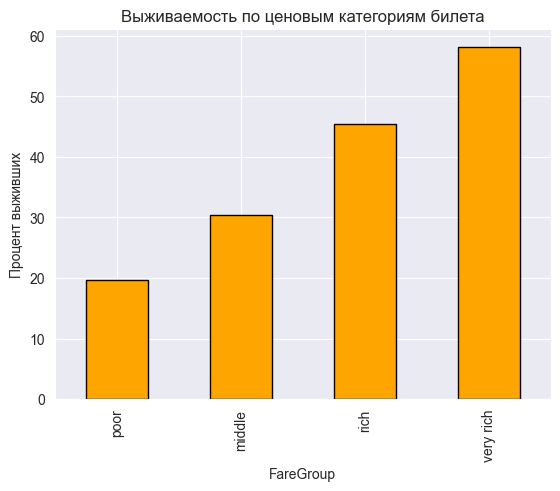

In [156]:
survival_rate.plot(kind='bar', color='orange', edgecolor='black' )
plt.ylabel('Процент выживших')
plt.title('Выживаемость по ценовым категориям билета')
plt.show()

✅ 11. Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. 
 - Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого.
 - Придумайте свой признак, который может быть полезен, и добавьте его в таблицу.

In [157]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Хоть и содержится информация в FamilySize, для лин. модели может быть полезным.
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [158]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,FareGroup,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,NoInform,poor,2,0
1,1,1,female,38.0,1,0,71.2833,C85,very rich,2,0
2,1,3,female,26.0,0,0,7.9250,NoInform,middle,1,1
3,1,1,female,35.0,1,0,53.1000,C123,very rich,2,0
4,0,3,male,35.0,0,0,8.0500,NoInform,middle,1,1


✅ 12. Есть ли в данных пропуски? В каких столбцах: сколько пропусков в каждом из них?

In [159]:
df.isna().sum().sum()

np.int64(0)

✅ 13. Какая фамилия была самой популярной на корабле?)

In [160]:
df = pd.read_csv('data/train.csv')
df["Name"].str.split(",").str.get(0).describe()["top"]

'Andersson'

### 📈Numpy 

In [161]:
import numpy as np

✅ 1. Напишите функцию, возвращающую округленную взвешенную сумму чисел по данным числам и весам к ним. 

In [162]:
def weighted_size_numbers(weights: np.array, marks: np.array) -> int:
    return int(np.round(np.sum(weights * marks)))

In [163]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert weighted_size_numbers(weights, marks) == 8

In [164]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert weighted_size_numbers(weights, marks) == 4

✅ 2. Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив array([1.5, 0.5, 2, -4.1, -3, 6, -1]), массив array([1.2, 0.5, 1, -4, 3, 0, -1.2]) и число 0.5, то на выходе должен получиться массив array([0, 1, 3, 6]).

In [165]:
def find_close(array1: np.array, array2: np.array, precision: float) -> np.array:
    return np.arange(array1.shape[0])[np.abs(array1 - array2) <= precision]

In [166]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [167]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

✅ 3. Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [168]:
def diag_prod(matrix: np.array) -> int:
    return matrix.diagonal()[matrix.diagonal() != 0].prod()

In [169]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

✅ 4. Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Помните, что в вашем матрице не должно получаться пустых значений nan. 

4* Подумайте, почему могли бы возникнуть пустые значения?)

In [170]:
def normalize(matrix: np.array) -> np.array:
    matrix = np.array(matrix, dtype=float)
    mean = np.mean(matrix, axis=0)
    std = np.std(matrix, axis=0)
    std[std == 0] = 1
    return (matrix - mean) / std

In [171]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [172]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

✅ 5. Напишите функцию, вычисляющую косинусную близость двух векторов. Например, если на вход поступают вектора array([-2, 1, 0, -5, 4, 3, -3]) и array([0, 2, -2, 10, 6, 0, 0]), ответом будет -0.25.

In [173]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    numerator = np.dot(vec1, vec2)
    denominator = np.linalg.norm(vec1) * np.linalg.norm(vec2)
    return numerator / denominator

In [174]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [175]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)